# Narrative analytics and experimentation

Dataset: 
Historic Tour De France Dataset downloaded from Kaggle: https://www.kaggle.com/ralle360/historic-tour-de-france-dataset

Details:
The dataset contains variables regarding each stage of the Tour De France. The data is from 1903 though 2017.

## Explore the data set

In [35]:
import pandas as pd
import numpy as np
df = pd.read_csv('stages_TDF.csv')
df.head()

,Stage,Date,Distance,Origin,Destination,Type,Winner,Winner_Country
0,1,2017-07-01,14.0,Düsseldorf,Düsseldorf,Individual time trial,Geraint Thomas,GBR
1,2,2017-07-02,203.5,Düsseldorf,Liège,Flat stage,Marcel Kittel,GER
2,3,2017-07-03,212.5,Verviers,Longwy,Medium mountain stage,Peter Sagan,SVK
3,4,2017-07-04,207.5,Mondorf-les-Bains,Vittel,Flat stage,Arnaud Démare,FRA
4,5,2017-07-05,160.5,Vittel,La Planche des Belles Filles,Medium mountain stage,Fabio Aru,ITA


In [36]:
# Convert the Date field to Datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Get the year component from the Date field as a new field
df['year'] = df['Date'].dt.year
df

,Stage,Date,Distance,Origin,Destination,Type,Winner,Winner_Country,year
0,1,2017-07-01,14.0,Düsseldorf,Düsseldorf,Individual time trial,Geraint Thomas,GBR,2017
1,2,2017-07-02,203.5,Düsseldorf,Liège,Flat stage,Marcel Kittel,GER,2017
2,3,2017-07-03,212.5,Verviers,Longwy,Medium mountain stage,Peter Sagan,SVK,2017
3,4,2017-07-04,207.5,Mondorf-les-Bains,Vittel,Flat stage,Arnaud Démare,FRA,2017
4,5,2017-07-05,160.5,Vittel,La Planche des Belles Filles,Medium mountain stage,Fabio Aru,ITA,2017
5,6,2017-07-06,216.0,Vesoul,Troyes,Flat stage,Marcel Kittel,GER,2017
6,7,2017-07-07,213.5,Troyes,Nuits-Saint-Georges,Flat stage,Marcel Kittel,GER,2017
7,8,2017-07-08,187.5,Dole,Station des Rousses,Medium mountain stage,Lilian Calmejane,FRA,2017
8,9,2017-07-09,181.5,Nantua,Chambéry,High mountain stage,Rigoberto Urán,COL,2017
9,10,2017-07-11,178.0,Périgueux,Bergerac,Flat stage,Marcel Kittel,GER,2017


### Run some analysis and visuals

In [72]:
print("Analysis on total stage wins per country (1903-2017)")
df1 = df.groupby(['Winner_Country']).size().reset_index(name='counts')
df1


Analysis on total stage wins per country (1903-2017)


,Winner_Country,counts
0,AUS,29
1,AUT,4
2,BEL,460
3,BRA,1
4,CAN,1
5,COL,16
6,CZE,3
7,DEN,18
8,ESP,125
9,EST,4


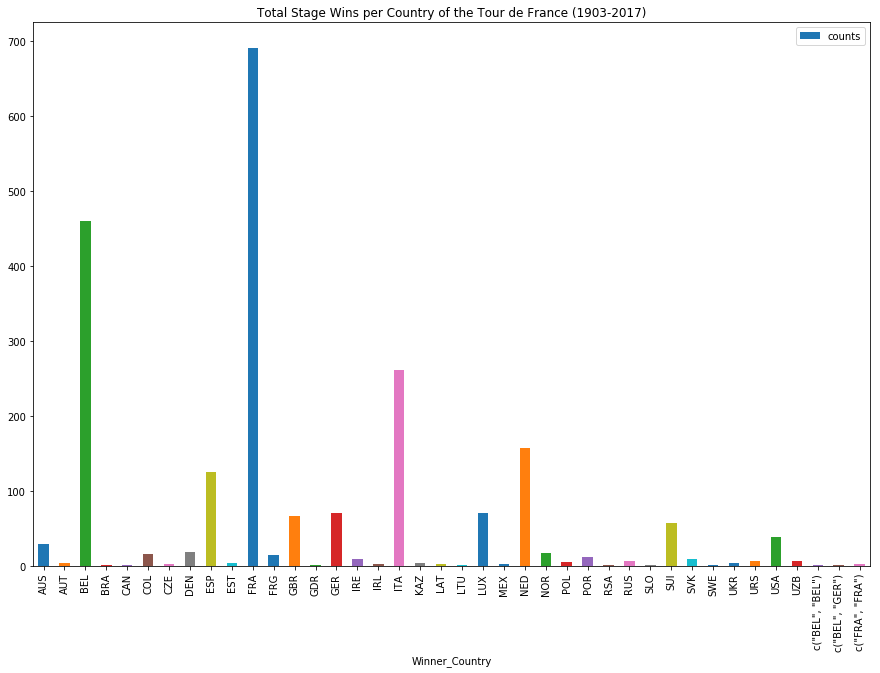

In [73]:
import matplotlib.pyplot as plt
df1.plot.bar(x="Winner_Country", y='counts',figsize=(15,10))
#df.plot(figsize=(15,10))
plt.title('Total Stage Wins per Country of the Tour de France (1903-2017)')
plt.show()

In [74]:
print("Analysis on average stage wins per country per year (1903-2017)")

df3 = df.groupby(['Winner_Country','year']).size().reset_index(name='counts')
#df3
df4 = df3.groupby(['Winner_Country']).counts.mean()
df4

Analysis on average stage wins per country per year (1903-2017)


Winner_Country
AUS                1.611111
AUT                2.000000
BEL                5.411765
BRA                1.000000
CAN                1.000000
COL                1.230769
CZE                1.000000
DEN                1.500000
ESP                2.232143
EST                1.000000
FRA                6.774510
FRG                2.800000
GBR                2.310345
GDR                1.000000
GER                2.366667
IRE                1.125000
IRL                1.000000
ITA                3.589041
KAZ                1.333333
LAT                2.000000
LTU                1.000000
LUX                2.187500
MEX                1.000000
NED                3.019231
NOR                1.545455
POL                1.250000
POR                1.200000
RSA                1.000000
RUS                1.000000
SLO                1.000000
SUI                1.838710
SVK                1.800000
SWE                1.000000
UKR                2.000000
URS                3.000000
USA  

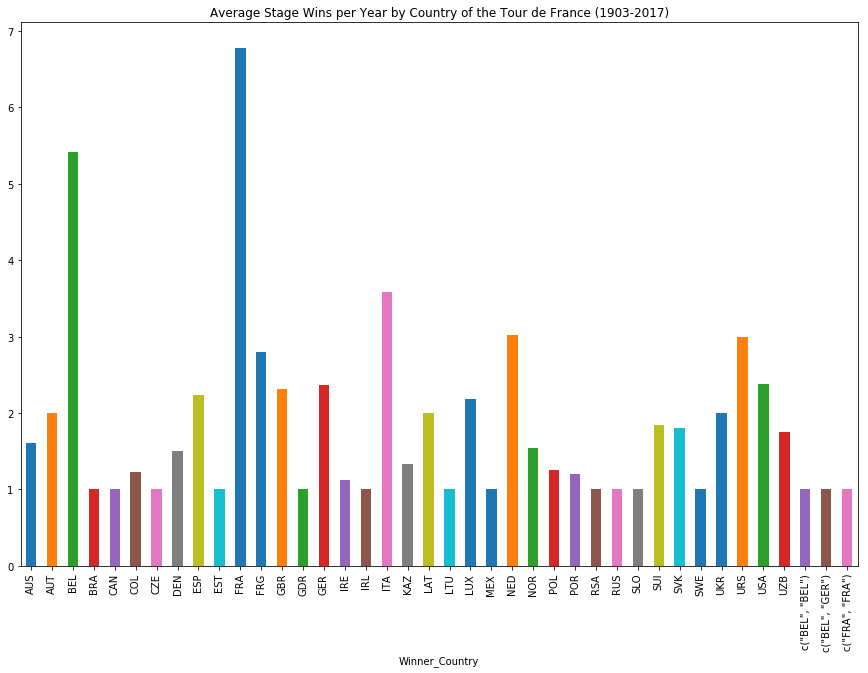

In [75]:
df4.plot.bar(x="Winner_Country", figsize=(15,10))
#df.plot(figsize=(15,10))
plt.title('Average Stage Wins per Year by Country of the Tour de France (1903-2017)')
plt.show()

In [76]:
print("Analysis on total stage wins per cyclist (1903-2017)")
df5 = df.groupby(['Winner']).size().reset_index(name='counts').sort_values("counts", ascending=False)
df6 = df5.head(20)
df6

Analysis on total stage wins per cyclist (1903-2017)


,Winner,counts
156,Eddy Merckx,34
563,Mark Cavendish,30
74,Bernard Hinault,28
43,André Leducq,24
38,André Darrigade,22
617,Nicolas Frantz,20
478,Lance Armstrong[n 1],20
241,François Faber,18
368,Jean Alavoine,17
106,Charles Pélissier,16


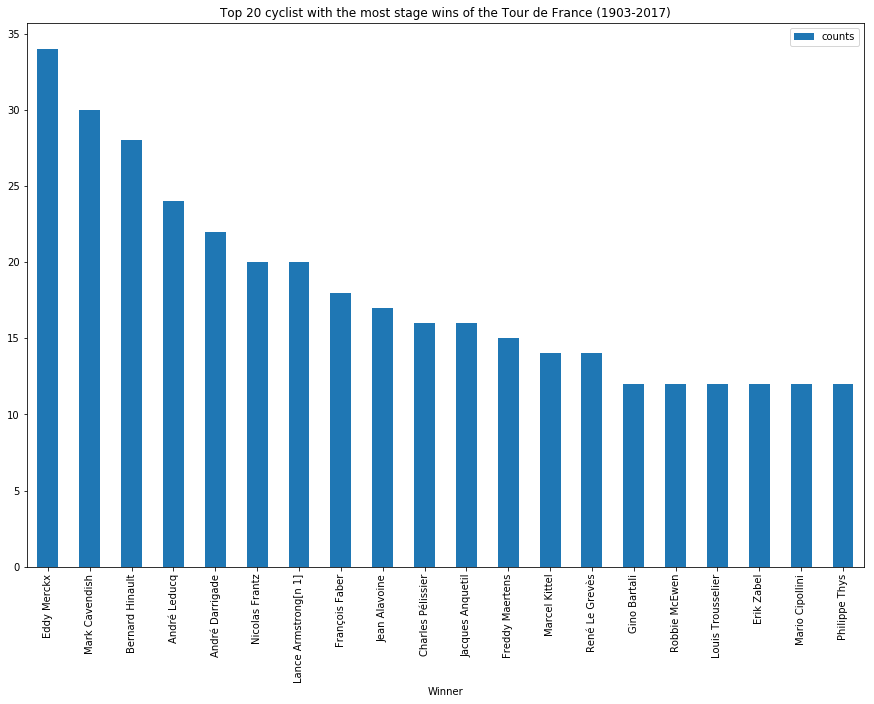

In [78]:

df6.plot.bar(x="Winner", figsize=(15,10))
plt.title('Top 20 cyclist with the most stage wins of the Tour de France (1903-2017)')
plt.show()

## Research Proposal

### The Problem:
Certain countries are concerned that their cyclists are not winning enough of the Tour de France stages

In pro cycling (and most every other sport) in search of marginal advantages, athletes' diets became more important. Tour cyclists require some 6,000-plus calories per day, and that one easily loses one's appetite sometime around the fifth viscous carbohydrate gel slurped down while on the bike, and that stomach issues on one day can derail an entire year's worth of preparation, and you see why you'd want to control that variable. Gone are the days of unpalatable chicken breasts and overcooked pasta with ketchup every night; in are fresh, whole foods and specialty diets and someone who can take charge of delivering calories at the right times in the right ways. Onboarding team chefs now seem like a differentiating strategy.

### The Potential Solution (Hypothesis):
Improving the eating experience of the cyclists will increase wins

What are more of the detailed specifics of what constitutes an improved eating experience?

The Tour de France is among the great human achievements of energy expenditure -  which means it's equally reliant on energy replenishment. Racing your bike for four-to-six hours nearly every day for three weeks is not particularly natural or good for you. But if, along the way, you could eat delicious regional cuisine for pleasure, instead of simply ingesting calories because science, it might remove the insult from the injury.

Improving eating experience is both art and science behind the whole what-to-eat-and-when question, with topics like macronutrient delivery or anti-inflammatory properties; making sure emaciated warriors get a steak dinner as a morale boost, or fresh sashimi after the hardest days are over. It’s about enjoyment including produce and ingredients sourced from family-owned farms for the finest meats and cheeses in all the land, heirloom strawberry-picking, organic asparagus-digging, Mediterranean tuna fresh off the boat, lamb and beef and chicken straight from the butcher, exceptional wine and deserts. 

### The Method of Testing the Solution (Rollout Plan):
For the next three years, apply two different meal experiences to two groups of random cyclists across each country for the three grand tour stage races including Giro d’Italia, Tour de France, and Vuelta a España. Testing with not just the Tour de France but with the additional two of the 3 grand tours will help ensure that there’s less bias to how certain cyclists might be better in our type of tour than the other.

In one group, several hired highly rated gourmet chefs and their team will design and execute the venue for all meals during each of the tours for the entire 21+ stages 3+ week long competitions, and provide the meals to the athletes. 

All of the cyclists in this group would be provided the same food for each meal. In the other group, the cyclists will continue with their traditional meal programs designed by each of their teams. This would be an A/B experiment where a group gets the standard team meal plans or the new one.

### Evaluation Plan
The variable of interest is win rate per country in the group given the new meal plan and the group that continues to be provided the standard team meal plans.

We will compute the win rate per country based on the last 5 years from the historical results data for all three grand tours before the study and compare them to the results during the next 3 years of the win rate per country per grand tour in the group that gets the standard team meal plans and new Michelin chef designed meal plans.

We will perform preliminary analysis of the results first to look to see if there are metrics of statistical significance. We will identify these significant findings and assess if they correlate to influence or factors not related to the meals for example, team attrition, new members, changes in staff, changes in training routines, changes in equipment, or injuries. Additionally we will assess if certain countries or cyclists are better in one of the grand tours than the others.

Once we have factored for these, we will analyze the win rate per cyclist and country. If in the 3 years win rate increases by 10% among the group with the new meal plans, conclude that the new meal plans are effective. Provide the findings to all teams and recommend them to consider this strategy. If the win rate in the next 3 years increases among the group with the new meal plan, but by less than one standard deviation, observe for 1 more year. If win rate does not increase in 3 years, provide the findings to all teams and have them consider not changing their existing meal plan strategies.